# Exercise 10-1: Create a linear regression

## Get the data

In [4]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
fish = pd.read_csv('Fish.csv')

In [6]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Clean the data

In [8]:
# read the info.txt file and rename the Length columns so they're more descriptive
fish = fish.rename(columns={'Length1':'VerticalLength', 
                     'Length2':'DiagonalLength', 
                     'Length3':'CrossLength'})

## Identify a correlation

In [14]:
# get the correlation data for the Weight column
fish_numeric = fish[['Weight','VerticalLength','DiagonalLength','CrossLength','Height','Width']]
fish_numeric.corr()[['Weight']]

,Weight
Weight,1.000000
VerticalLength,0.915712
DiagonalLength,0.918618
CrossLength,0.923044
Height,0.724345
Width,0.886507


<Axes: >

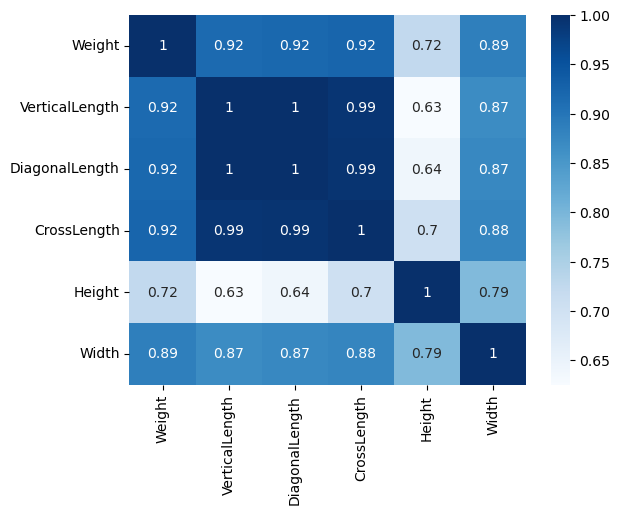

In [16]:
# create a heatmap for the correlation data
sns.heatmap(data=fish_numeric.corr(), annot=True, cmap='Blues')

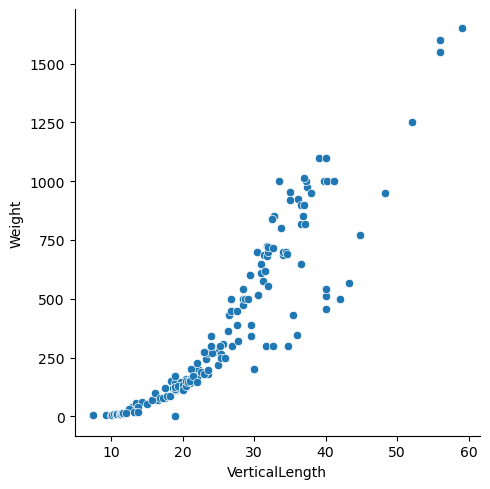

In [18]:
# use a scatterplot to plot the correlation between weight and vertical length for all fish
sns.relplot(data=fish, x='VerticalLength', y='Weight')

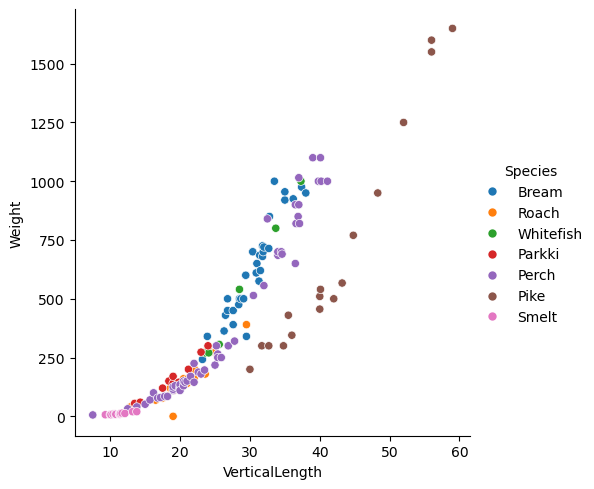

In [20]:
# create the same scatterplot as the previous cell, but use color to identify each species
sns.relplot(data=fish, x='VerticalLength', y='Weight', hue='Species')

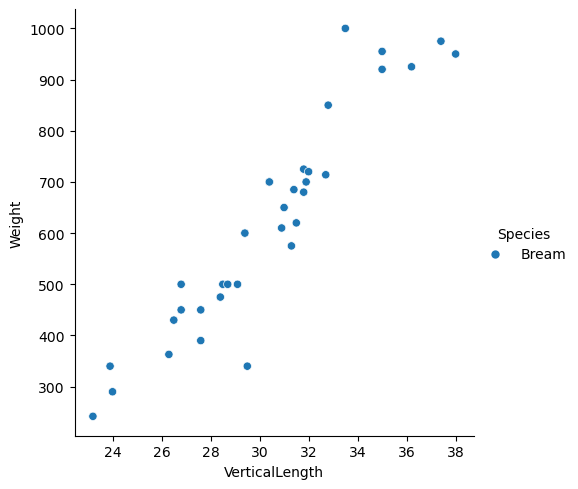

In [22]:
# create the same scatterplot as the previous cell, but only display data for the Bream species
sns.relplot(data=fish.query('Species == "Bream"'), 
            x='VerticalLength', y='Weight', hue='Species')

## Create a linear model

In [25]:
# filter the data so it only contains the values for the Bream species 
# and assign the resulting DataFrame to a variable named bream
bream = fish.query('Species == "Bream"')

In [27]:
# split the training and testing data
x_train, x_test, y_train, y_test = train_test_split(
    bream[['VerticalLength']], bream[['Weight']])

In [29]:
# create the model and fit the training data
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [32]:
# score the testing data
model.score(x_test, y_test)

0.7856070148267122

In [36]:
# make the predictions
y_predicted = model.predict(x_test)
predicted = pd.DataFrame(y_predicted, columns = ['PredictedWeight'])

## Plot the regression line

In [39]:
# join the predicted data with the original data
final = predicted.join([x_test.reset_index(drop=True),
                        y_test.reset_index(drop=True)])
final = final.rename(columns={'Weight':'ActualWeight'})
final.head()

,PredictedWeight,VerticalLength,ActualWeight
0,547.223670,29.1,500.0
1,270.774498,23.9,340.0
2,690.764586,31.8,680.0
3,781.142200,33.5,1000.0
4,860.887154,35.0,955.0


In [41]:
# melt the actual and predicted data
finalMelt = pd.melt(final, id_vars=['VerticalLength'], 
                    value_vars=['ActualWeight','PredictedWeight'], 
                    var_name='Variable', value_name='Value')
finalMelt.head()

,VerticalLength,Variable,Value
0,29.1,ActualWeight,500.0
1,23.9,ActualWeight,340.0
2,31.8,ActualWeight,680.0
3,33.5,ActualWeight,1000.0
4,35.0,ActualWeight,955.0


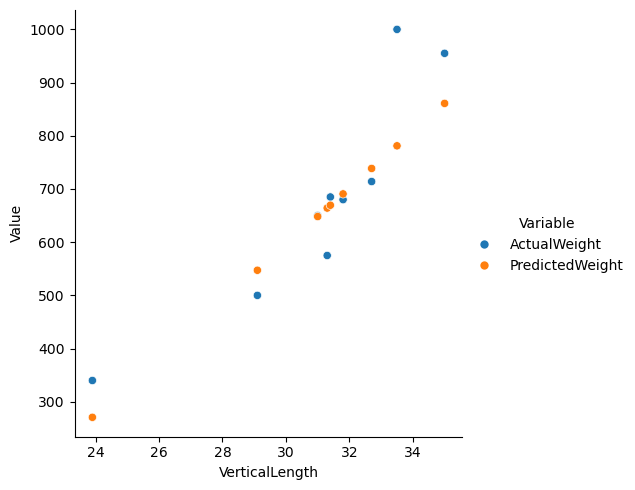

In [43]:
# use relplot() to plot the actual and predicted data
sns.relplot(data=finalMelt, x='VerticalLength', y='Value', hue='Variable')

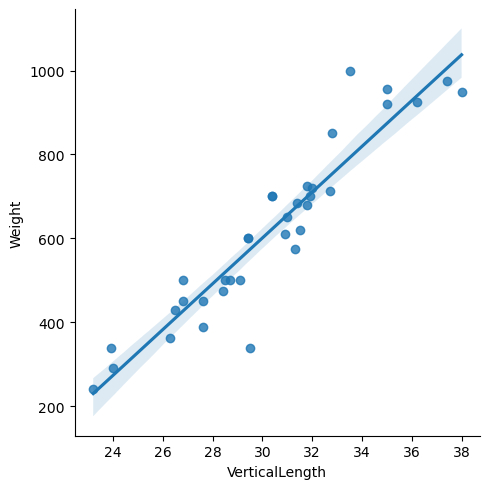

In [45]:
# use lmplot() to produce a similar result
# NOTE: use the DataFrame named bream with this method
sns.lmplot(data=bream, x='VerticalLength', y='Weight')

## Plot the residuals

In [48]:
# calculate the residuals and store them in a column
final['Residuals'] = final.ActualWeight - final.PredictedWeight

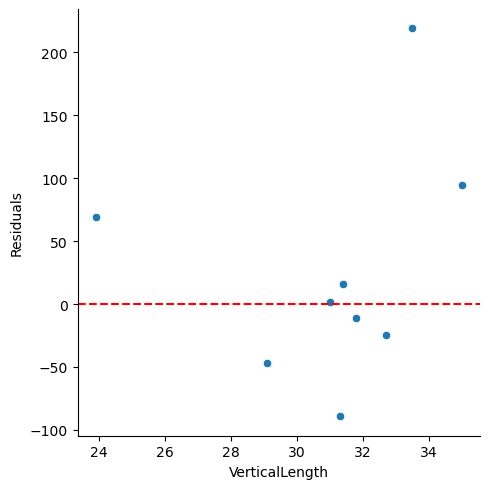

In [50]:
# use relplot() to create a scatterplot for the residuals
g = sns.relplot(data=final, x='VerticalLength', y='Residuals')
for ax in g.axes.flat:
    ax.axhline(0, ls='--', color='red')

<Axes: xlabel='VerticalLength', ylabel='Weight'>

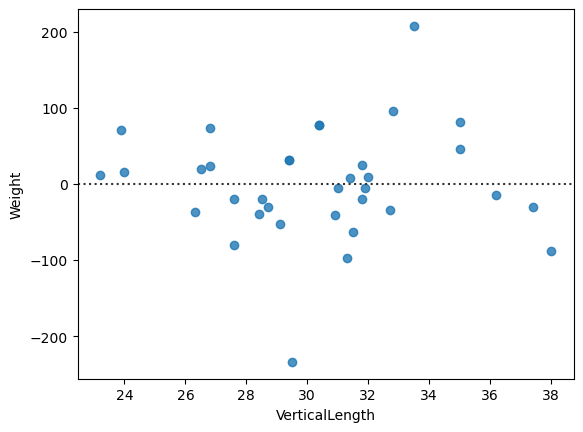

In [52]:
# use residplot() to produce a similar result
# NOTE: use the DataFrame named bream with this method
sns.residplot(data=bream, x='VerticalLength', y='Weight')